<a href="https://colab.research.google.com/github/DaVOVAN/MO_Trefilov/blob/main/laba8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn
!pip install  keras
!pip install  nltk
!pip install  pandas
!pip install  numpy
!pip install  re
!pip install  codecs

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement codecs (from versions: none)
ERROR: No matching distribution found for codecs


In [ ]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = '/content/drive/MyDrive/Нейросети/Tweets.csv'

In [ ]:
df = pd.read_csv(url,encoding='utf-8')
df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [ ]:
df.describe()

textID                                  text selected_text  \
count        27481                                 27480         27480   
unique       27481                                 27480         22463   
top     cb774db0d1   I`d have responded, if I were going          good   
freq             1                                     1           199   

       sentiment  
count      27481  
unique         3  
top      neutral  
freq       11118

In [ ]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

df = standardize_text(df, "text")

df.to_csv("clean_data.csv")
df.head()

textID                                               text  \
0  cb774db0d1                i`d have responded, if i were going   
1  549e992a42      sooo sad i will miss you here in san diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [ ]:
clean_df = pd.read_csv("clean_data.csv")
clean_df.tail()

Unnamed: 0      textID  \
27476       27476  4eac33d1c0   
27477       27477  4f4c4fc327   
27478       27478  f67aae2310   
27479       27479  ed167662a5   
27480       27480  6f7127d9d7   

                                                    text  \
27476   wish we could come see u on denver  husband l...   
27477   i`ve wondered about rake to.  the client has ...   
27478   yay good for both of you. enjoy the break - y...   
27479                         but it was worth it  ****.   
27480     all this flirting going on - the atg smiles...   

                                           selected_text sentiment  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral

In [ ]:
clean_df.groupby("sentiment").count()

Unnamed: 0  textID   text  selected_text
sentiment                                          
negative         7781    7781   7781           7781
neutral         11118   11118  11117          11117
positive         8582    8582   8582           8582

In [ ]:
def undersample(df):
    min_class_size = min(df.groupby("sentiment").size())
    balanced_df = pd.DataFrame(columns=df.columns)
    for sentiment, group in df.groupby("sentiment"):
        balanced_df = pd.concat([balanced_df, group.sample(n=min_class_size)])
    balanced_df = sklearn.utils.shuffle(balanced_df)
    return balanced_df

balanced_df = undersample(clean_df)
balanced_df.groupby("sentiment").count()

Unnamed: 0  textID  text  selected_text
sentiment                                         
negative         7781    7781  7781           7781
neutral          7781    7781  7780           7780
positive         7781    7781  7781           7781

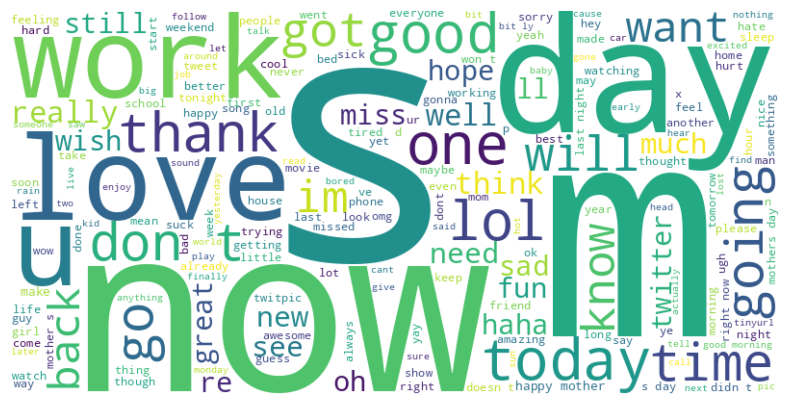

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(balanced_df["text"].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt_tab')

def tokenize_text_nltk(text):
    try:
        words = nltk.word_tokenize(text)
        return words
    except TypeError:
        return []


balanced_df['tokens'] = balanced_df['text'].apply(tokenize_text_nltk)

balanced_df[['text', 'tokens']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


text  \
21779  my dad just told me that he wants to put me up...   
15364  morning all. it`s monday. sigh. trying to have...   
26222  theres a fricken prisnor trans outside r hotel...   
1632                                   hope yer ok hunny   
14188             i really should be in a bad mood. but.   

                                                  tokens  
21779  [my, dad, just, told, me, that, he, wants, to,...  
15364  [morning, all, ., it, `, s, monday, ., sigh, ....  
26222  [theres, a, fricken, prisnor, trans, outside, ...  
1632                              [hope, yer, ok, hunny]  
14188  [i, really, should, be, in, a, bad, mood, ., b...

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from  keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in balanced_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in balanced_df["tokens"]]
VOCAB = sorted(list(set(all_words)))

print("%s слов всего, с размером словаря %s" % (len(all_words), len(VOCAB)))
print("Длина длиннейшего предложения - %s" % max(sentence_lengths))

373275 слов всего, с размером словаря 25489
Длина длиннейшего предложения - 106


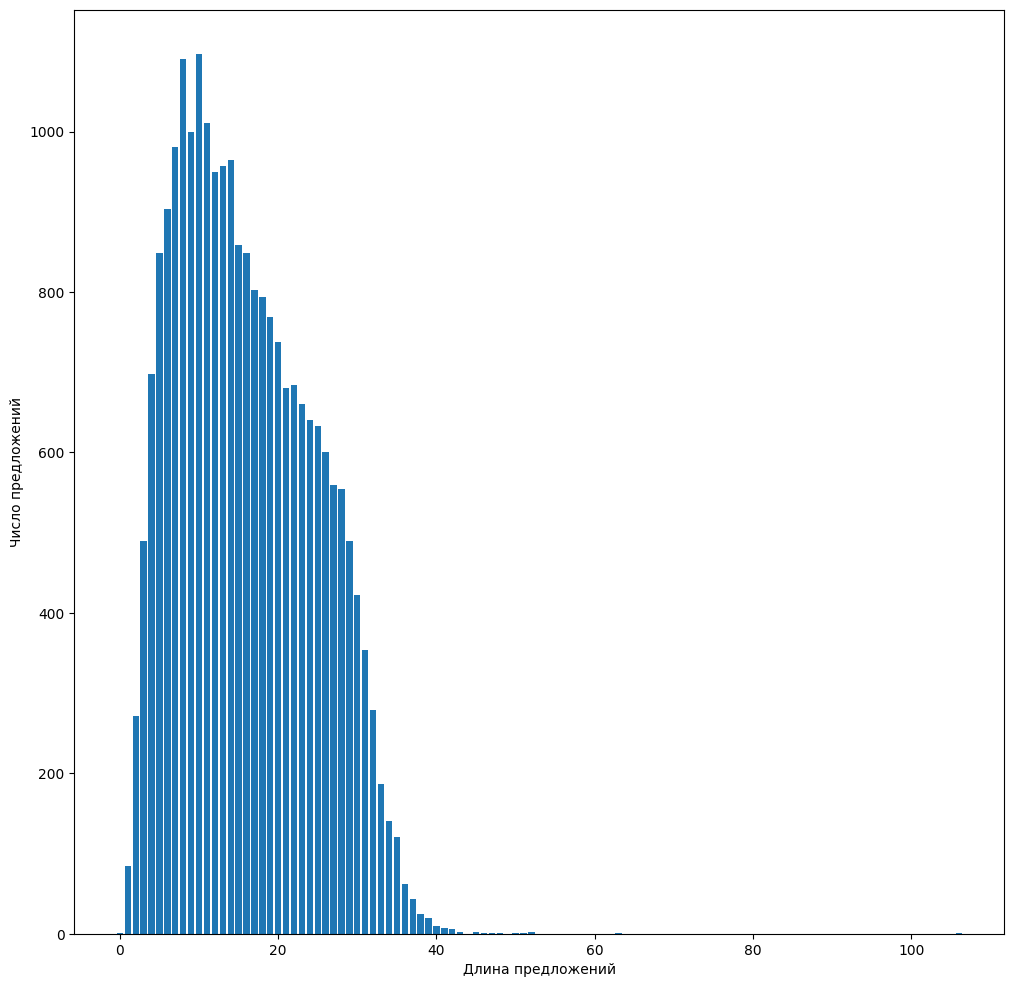

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
plt.xlabel('Длина предложений')
plt.ylabel('Число предложений')
plt.hist(sentence_lengths, bins=range(min(sentence_lengths), max(sentence_lengths) + 2), align='left', rwidth=0.8)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

balanced_df = balanced_df.dropna(subset=['text'])
list_corpus = balanced_df["text"].tolist()
list_labels = balanced_df["sentiment"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

print("X_train shape:", X_train_counts.shape)
print("X_test shape:", X_test_counts.shape)

X_train shape: (18673, 20732)
X_test shape: (4669, 20732)


<Figure size 1600x1600 with 0 Axes>

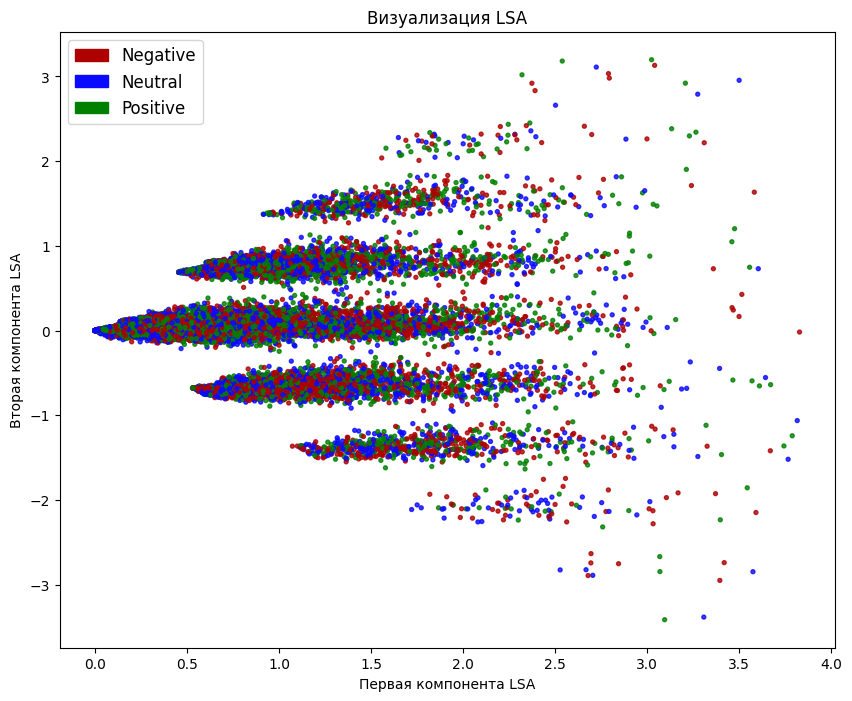

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)

def plot_LSA(test_data, test_labels, savepath="LSA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)

    # Настраиваем цвета для трех классов
    colors = ['#AF0000', '#0A0AFF', '#008000'] # Красный, синий, зеленый
    cmap = matplotlib.colors.ListedColormap(colors)

    if plot:
        plt.figure(figsize=(10, 8)) # Увеличили размер графика для лучшей читаемости
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=cmap)

        # Легенда с правильными названиями классов
        red_patch = mpatches.Patch(color='#AF0000', label='Negative')
        blue_patch = mpatches.Patch(color='#0A0AFF', label='Neutral')
        green_patch = mpatches.Patch(color='#008000', label='Positive')
        plt.legend(handles=[red_patch, blue_patch, green_patch], prop={'size': 12})
        plt.xlabel("Первая компонента LSA")
        plt.ylabel("Вторая компонента LSA")
        plt.title("Визуализация LSA")
        plt.show()

fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train_counts, y_train_encoded)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', n_jobs=-1, random_state=40)

clf.fit(X_train_counts, y_train_encoded)
y_predicted_counts = clf.predict(X_test_counts)
y_predicted_labels = le.inverse_transform(y_predicted_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score, classification_report

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_labels)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

print(classification_report(y_test, y_predicted_labels))

accuracy = 0.650, precision = 0.653, recall = 0.650, f1 = 0.651
              precision    recall  f1-score   support

    negative       0.68      0.66      0.67      1545
     neutral       0.55      0.58      0.56      1553
    positive       0.73      0.71      0.72      1571

    accuracy                           0.65      4669
   macro avg       0.65      0.65      0.65      4669
weighted avg       0.65      0.65      0.65      4669



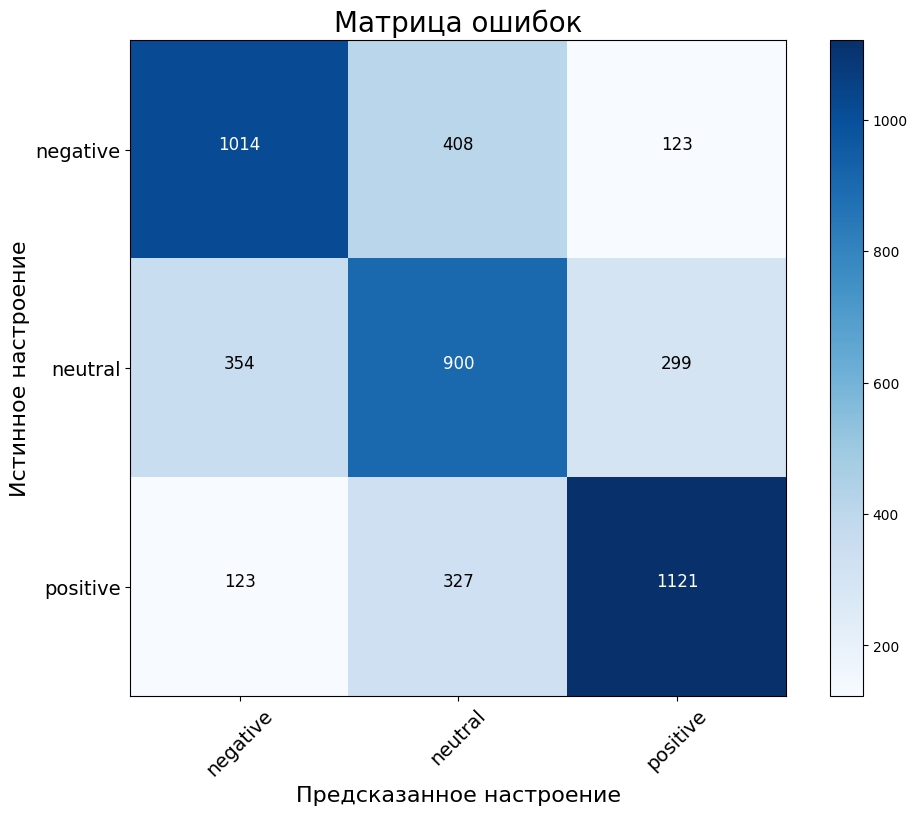

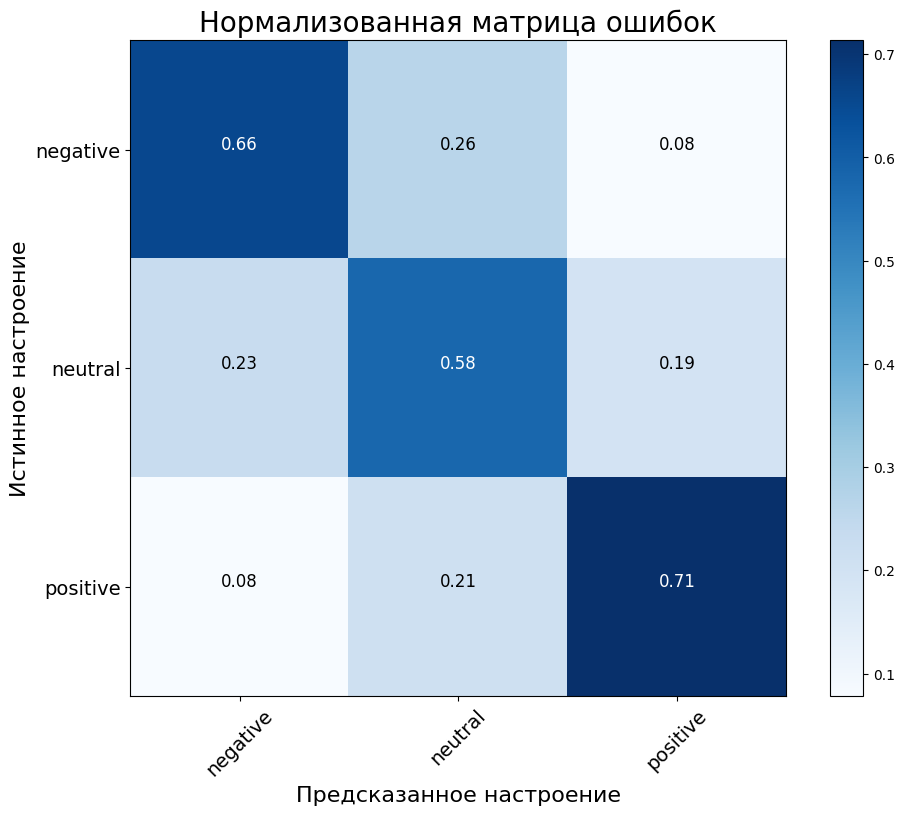

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Матрица ошибок',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=12)

    plt.tight_layout()
    plt.ylabel('Истинное настроение', fontsize=16)
    plt.xlabel('Предсказанное настроение', fontsize=16)
    plt.show()


cm = confusion_matrix(y_test, y_predicted_labels)
classes = ['negative', 'neutral', 'positive']

plot_confusion_matrix(cm, classes, title='Матрица ошибок')

plot_confusion_matrix(cm, classes, normalize=True, title='Нормализованная матрица ошибок')

In [ ]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}
    classes = {}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i, el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key=lambda x: x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key=lambda x: x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops': tops,
            'bottom': bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

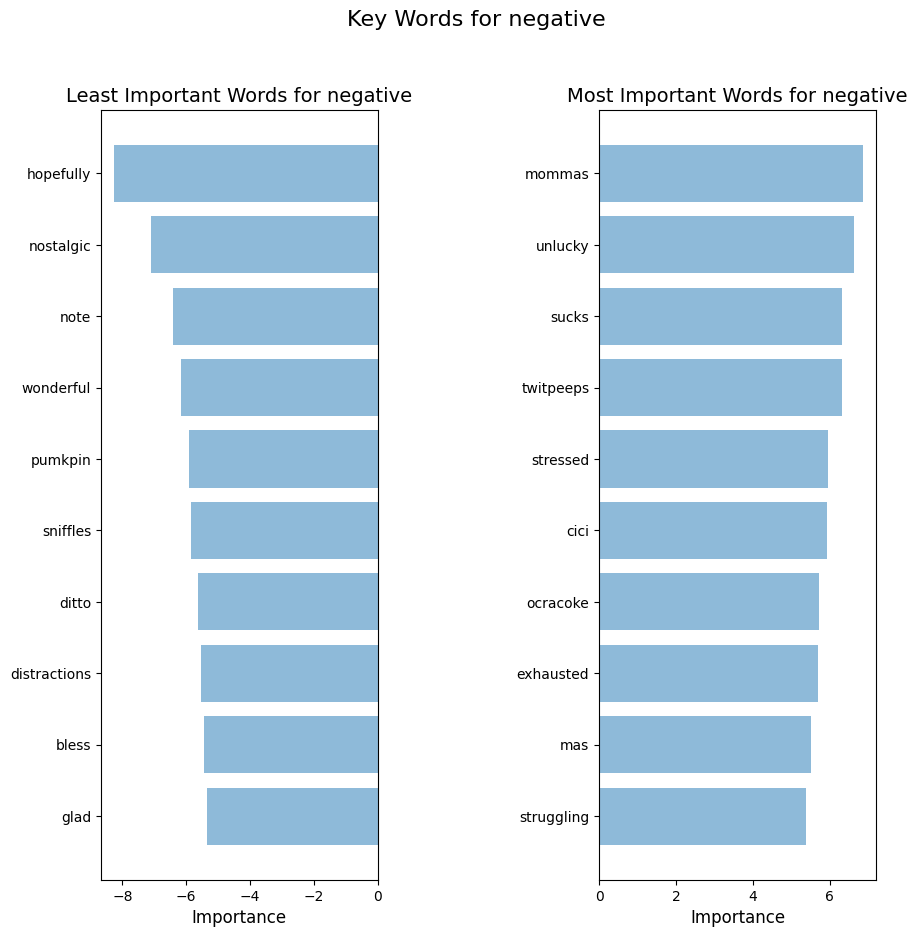

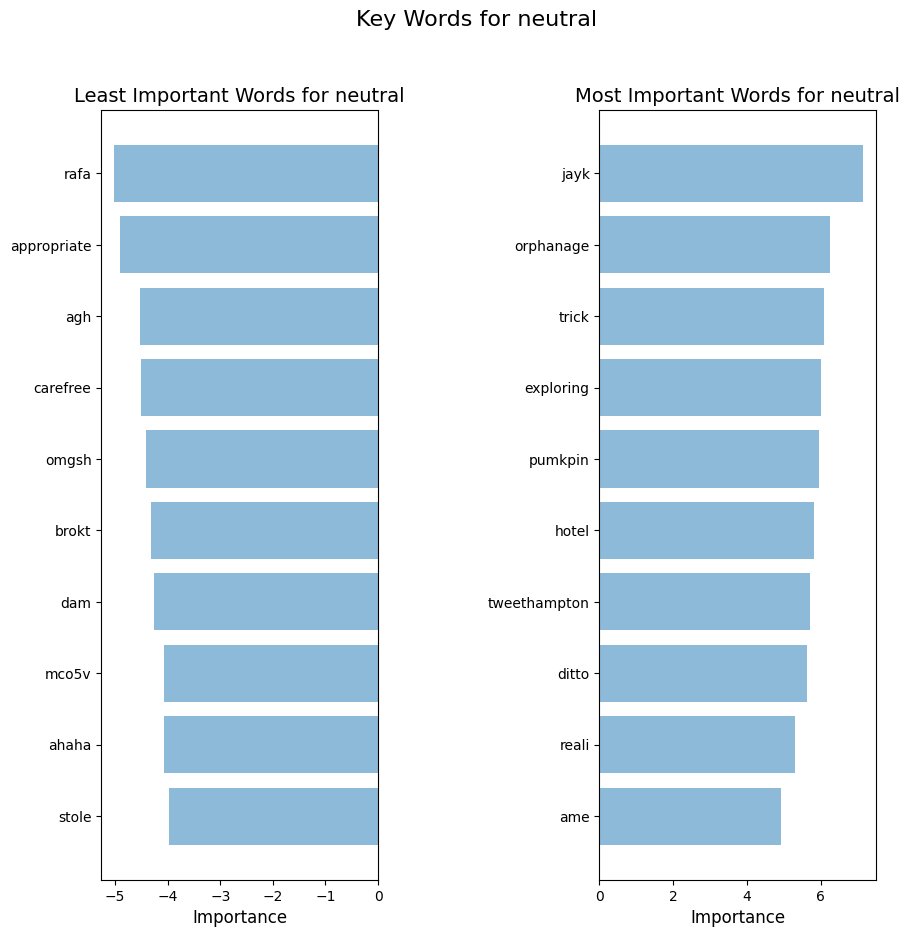

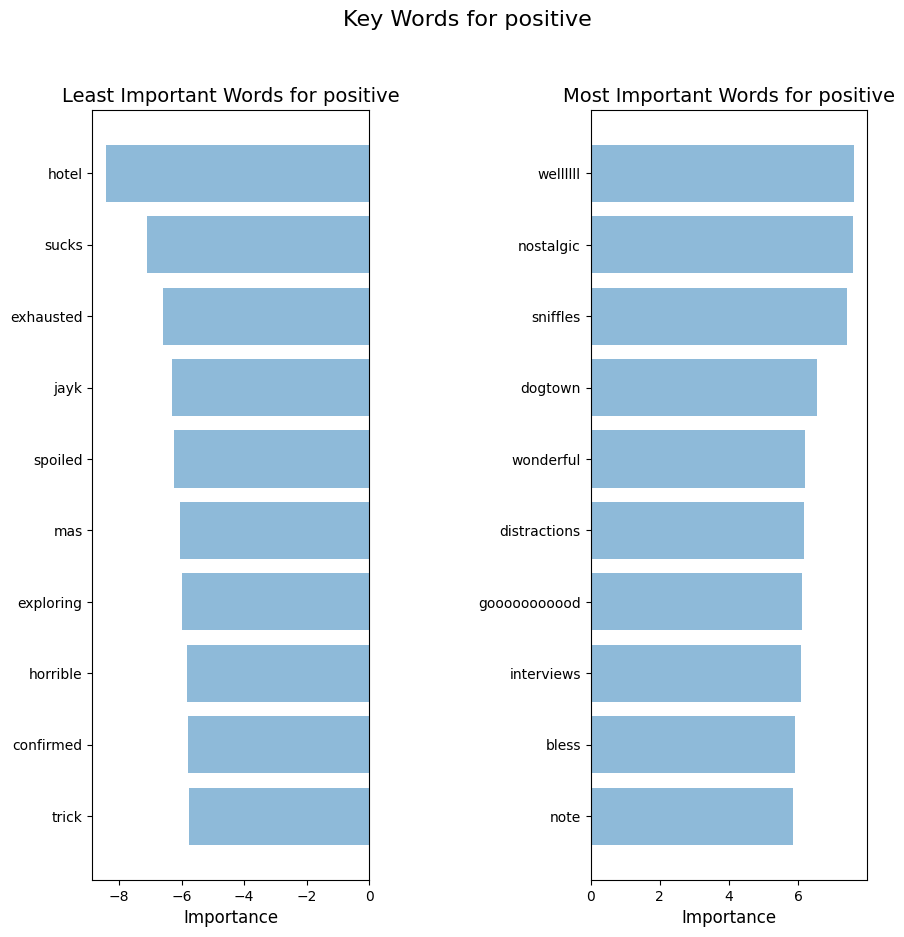

In [ ]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, class_name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a, b) for a, b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a, b) for a, b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]

    fig = plt.figure(figsize=(10, 10))

    plt.subplot(121)
    plt.barh(y_pos, bottom_scores, align='center', alpha=0.5)
    plt.title(f'Least Important Words for {class_name}', fontsize=14)
    plt.yticks(y_pos, bottom_words, fontsize=10)
    plt.xlabel('Importance', fontsize=12)

    plt.subplot(122)
    plt.barh(y_pos, top_scores, align='center', alpha=0.5)
    plt.title(f'Most Important Words for {class_name}', fontsize=14)
    plt.yticks(y_pos, top_words, fontsize=10)
    plt.xlabel('Importance', fontsize=12)

    plt.suptitle(f'Key Words for {class_name}', fontsize=16)
    plt.subplots_adjust(wspace=0.8)
    plt.show()


class_names = le.classes_

for class_index in range(len(class_names)):
    top_scores = [a[0] for a in importance[class_index]['tops']]
    top_words = [a[1] for a in importance[class_index]['tops']]
    bottom_scores = [a[0] for a in importance[class_index]['bottom']]
    bottom_words = [a[1] for a in importance[class_index]['bottom']]
    plot_important_words(top_scores, top_words, bottom_scores, bottom_words, class_names[class_index])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

<Figure size 1600x1600 with 0 Axes>

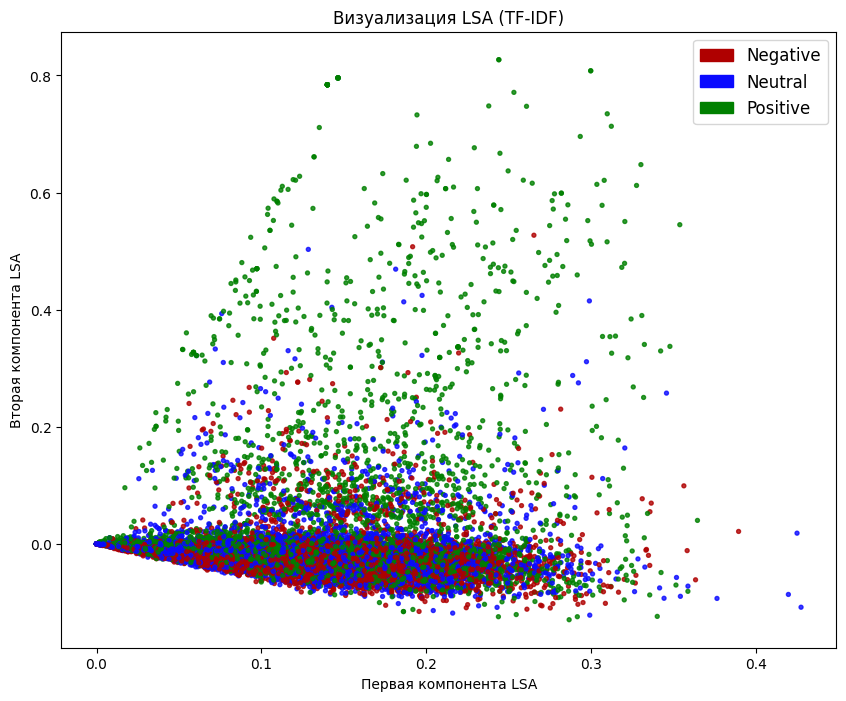

In [ ]:
def plot_LSA(test_data, test_labels, savepath="LSA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)

    colors = ['#AF0000', '#0A0AFF', '#008000']
    cmap = matplotlib.colors.ListedColormap(colors)

    if plot:
        plt.figure(figsize=(10, 8))
        plt.scatter(lsa_scores[:, 0], lsa_scores[:, 1], s=8, alpha=.8, c=test_labels, cmap=cmap)

        red_patch = mpatches.Patch(color='#AF0000', label='Negative')
        blue_patch = mpatches.Patch(color='#0A0AFF', label='Neutral')
        green_patch = mpatches.Patch(color='#008000', label='Positive')
        plt.legend(handles=[red_patch, blue_patch, green_patch], prop={'size': 12})
        plt.xlabel("Первая компонента LSA")
        plt.ylabel("Вторая компонента LSA")
        plt.title("Визуализация LSA (TF-IDF)")
        plt.show()


fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train_tfidf, y_train_encoded)
plt.show()

In [ ]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                              multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train_encoded)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)
y_predicted_tfidf_labels = le.inverse_transform(y_predicted_tfidf)

accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf_labels)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy = 0.657, precision = 0.659, recall = 0.657, f1 = 0.658


<Figure size 1000x1000 with 0 Axes>

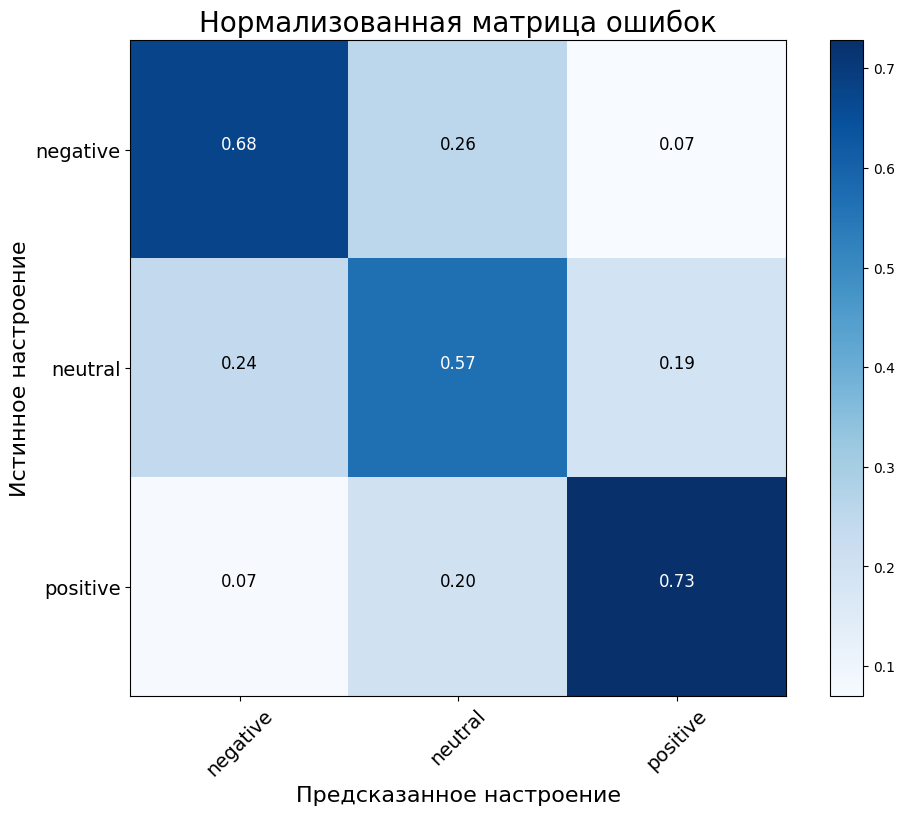


TF-IDF confusion matrix:
[[1043  394  108]
 [ 373  882  298]
 [ 115  312 1144]]

BoW confusion matrix:
[[1014  408  123]
 [ 354  900  299]
 [ 123  327 1121]]


In [ ]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf_labels)
classes = ['negative', 'neutral', 'positive']
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=classes, normalize=True, title='Нормализованная матрица ошибок')
plt.show()

print("\nTF-IDF confusion matrix:")
print(cm2)
print("\nBoW confusion matrix:")
print(cm)

In [ ]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

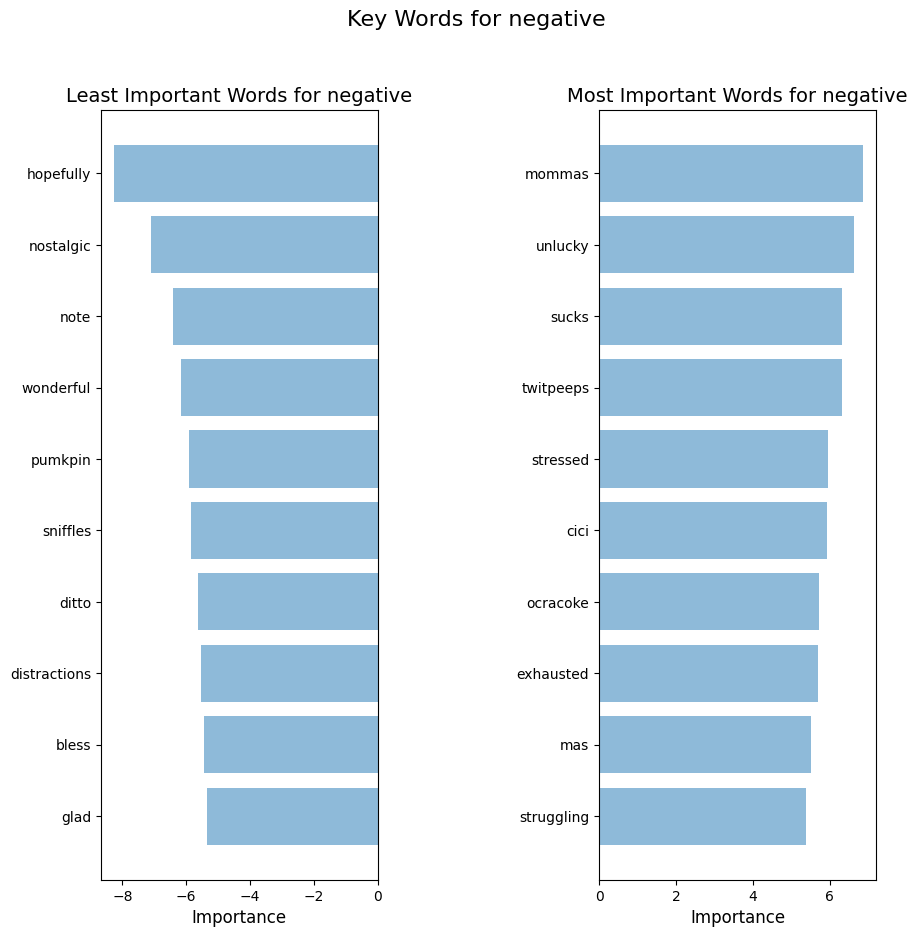

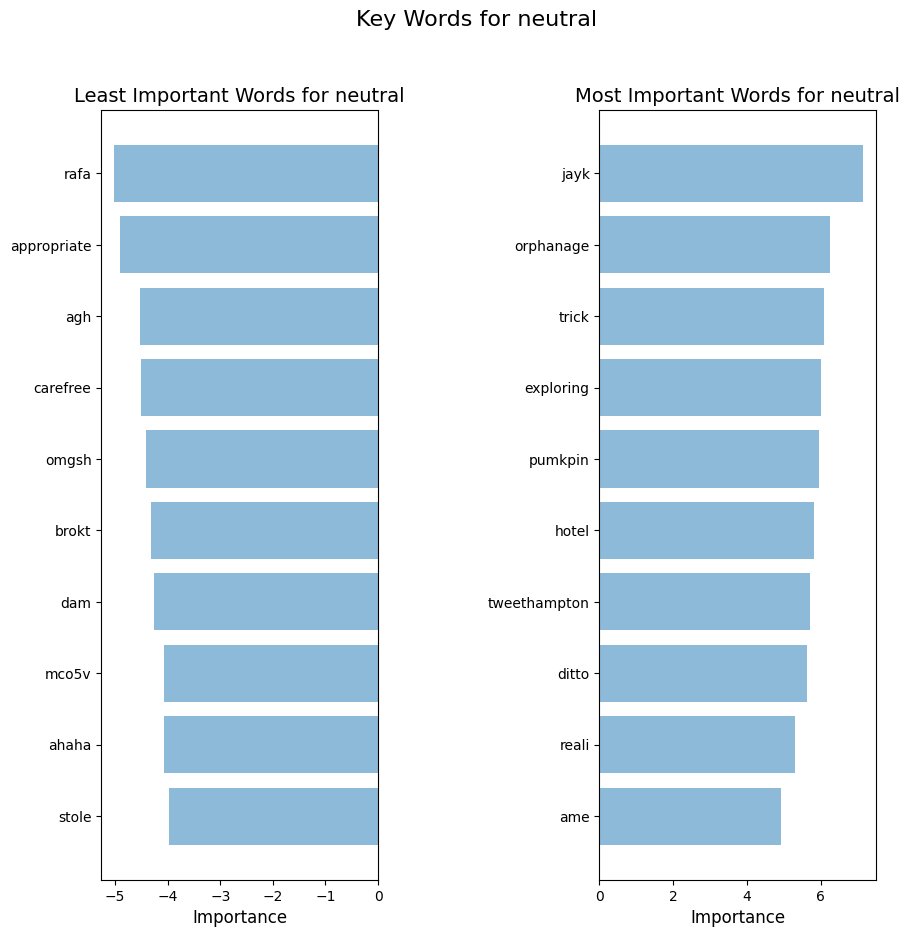

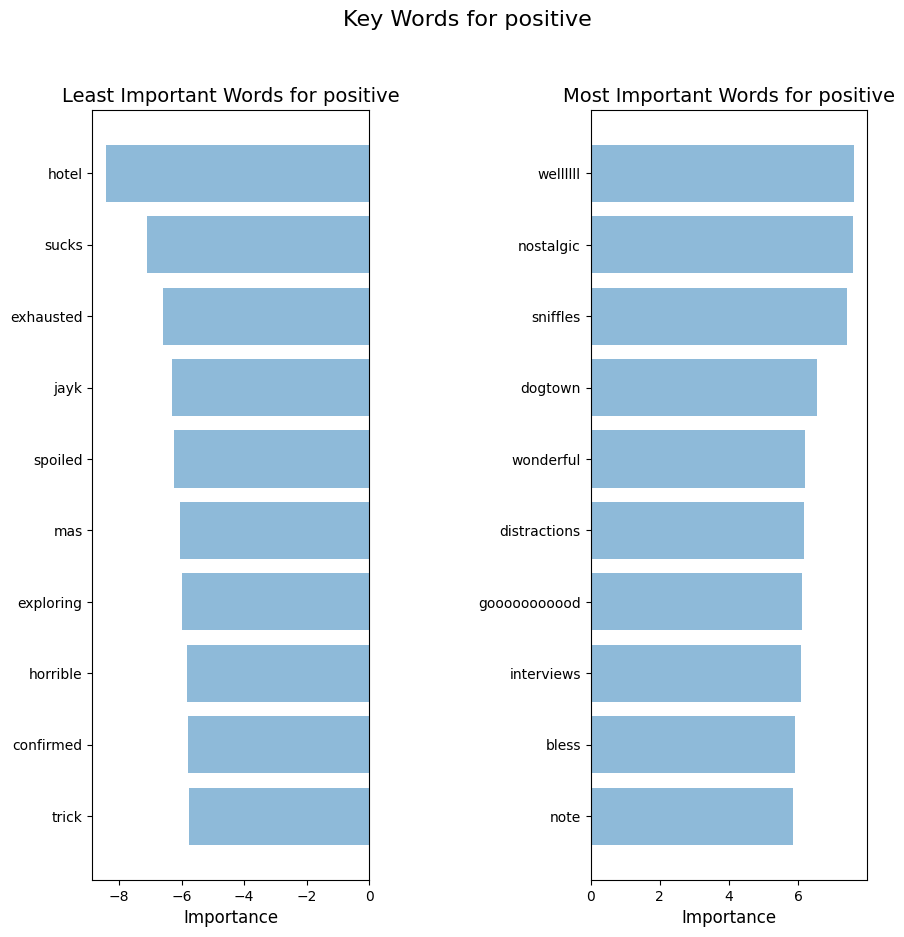

In [ ]:
for class_index in range(len(class_names)):
    top_scores = [a[0] for a in importance[class_index]['tops']]
    top_words = [a[1] for a in importance[class_index]['tops']]
    bottom_scores = [a[0] for a in importance[class_index]['bottom']]
    bottom_words = [a[1] for a in importance[class_index]['bottom']]
    plot_important_words(top_scores, top_words, bottom_scores, bottom_words, class_names[class_index])

In [ ]:
!python -m gensim.downloader --download word2vec-google-news-300

2024-12-12 12:56:40,891 : __main__ : INFO : Creating /root/gensim-data
[==================================================] 100.0% 1662.8/1662.8MB downloaded
2024-12-12 12:58:16,820 : __main__ : INFO : word2vec-google-news-300 downloaded
2024-12-12 12:58:16,820 : __main__ : INFO : Data has been installed and data path is /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
import gensim

# Load Google's pre-trained Word2Vec model.
word2vec_path = "~/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

<Figure size 1600x1600 with 0 Axes>

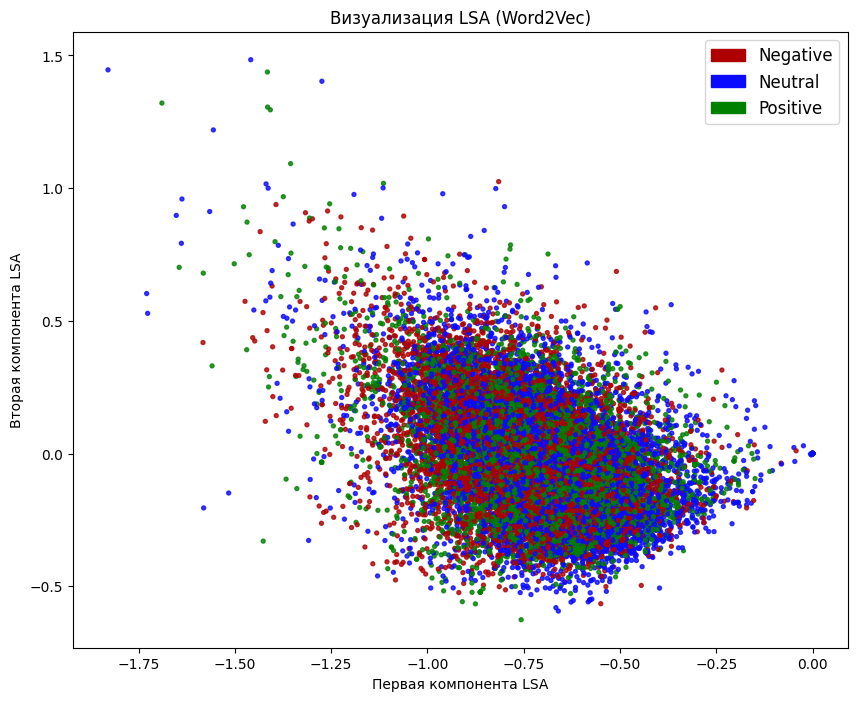

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged


def get_word2vec_embeddings(vectors, balanced_df, generate_missing=False):
    embeddings = balanced_df['tokens'].apply(lambda x: get_average_word2vec(x, vectors, generate_missing=generate_missing))
    return list(embeddings)


embeddings = get_word2vec_embeddings(word2vec, balanced_df)


le = LabelEncoder()
y_encoded = le.fit_transform(balanced_df['sentiment'])


X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, y_encoded,
                                                                                        test_size=0.2, random_state=40)


def plot_LSA(test_data, test_labels, savepath="LSA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    colors = ['#AF0000', '#0A0AFF', '#008000']
    cmap = matplotlib.colors.ListedColormap(colors)

    if plot:
        plt.figure(figsize=(10, 8))
        plt.scatter(lsa_scores[:, 0], lsa_scores[:, 1], s=8, alpha=.8, c=test_labels, cmap=cmap)

        red_patch = mpatches.Patch(color='#AF0000', label='Negative')
        blue_patch = mpatches.Patch(color='#0A0AFF', label='Neutral')
        green_patch = mpatches.Patch(color='#008000', label='Positive')
        plt.legend(handles=[red_patch, blue_patch, green_patch], prop={'size': 12})
        plt.xlabel("Первая компонента LSA")
        plt.ylabel("Вторая компонента LSA")
        plt.title("Визуализация LSA (Word2Vec)")
        plt.show()

fig = plt.figure(figsize=(16, 16))
plot_LSA(embeddings, y_encoded)
plt.show()

In [ ]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                             multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

y_predicted_word2vec_labels = le.inverse_transform(y_predicted_word2vec)

accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test, y_predicted_word2vec_labels)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy = 0.675, precision = 0.679, recall = 0.675, f1 = 0.677


<Figure size 1000x1000 with 0 Axes>

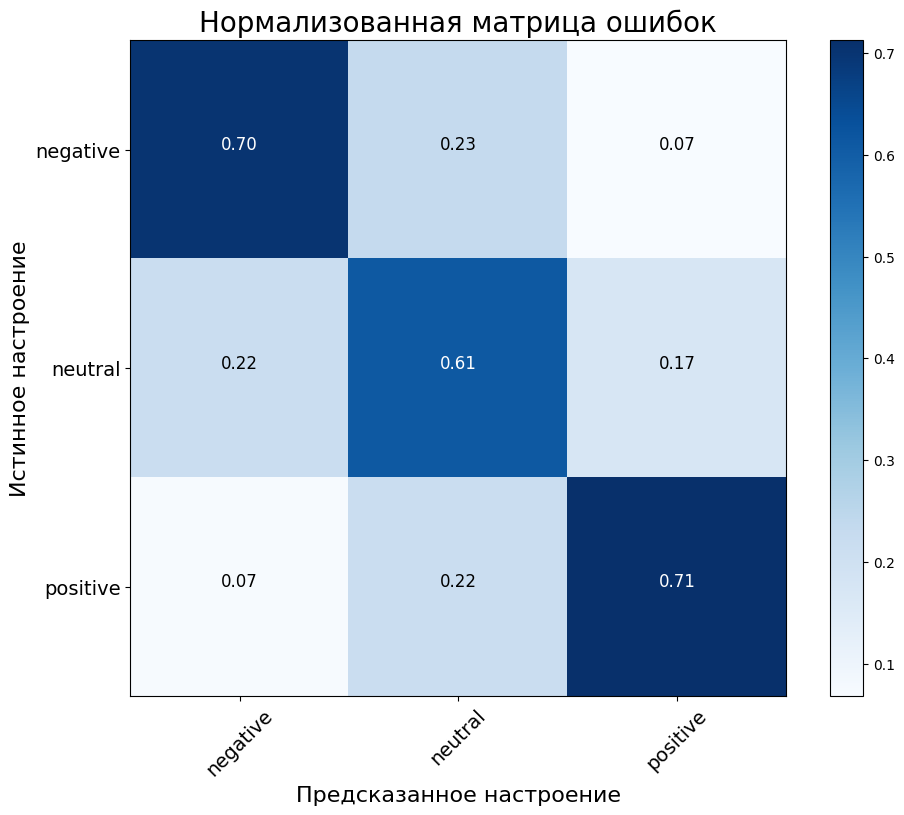


Word2Vec confusion matrix:
[[1083  357  105]
 [ 335  950  268]
 [ 112  339 1120]]

TF-IDF confusion matrix:
[[1043  394  108]
 [ 373  882  298]
 [ 115  312 1144]]

BoW confusion matrix:
[[1014  408  123]
 [ 354  900  299]
 [ 123  327 1121]]


In [ ]:
cm_w2v = confusion_matrix(y_test, y_predicted_word2vec_labels)
classes = ['negative', 'neutral', 'positive']
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm_w2v, classes=classes, normalize=True, title='Нормализованная матрица ошибок')
plt.show()

print("\nWord2Vec confusion matrix:")
print(cm_w2v)
print("\nTF-IDF confusion matrix:")
print(cm2)
print("\nBoW confusion matrix:")
print(cm)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=89ac15b63e3412edc8a5fcfd9c4f694519a0e82af390563617c12c35b34de60f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import gensim
import numpy as np
from sklearn.model_selection import train_test_split
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
from nltk.tokenize import RegexpTokenizer
from sklearn.preprocessing import LabelEncoder

vector_store = word2vec

def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)


def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ['negative', 'neutral', 'positive']):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)


X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(balanced_df['text'], balanced_df['sentiment'], test_size=0.2, random_state=40)
y_test_data_encoded = le.transform(y_test_data)

visualize_one_exp(X_test_data, y_test_data_encoded, 65)

Index: 65
True class: negative


In [ ]:
visualize_one_exp(X_test_data, y_test_data_encoded, 67)

Index: 67
True class: positive


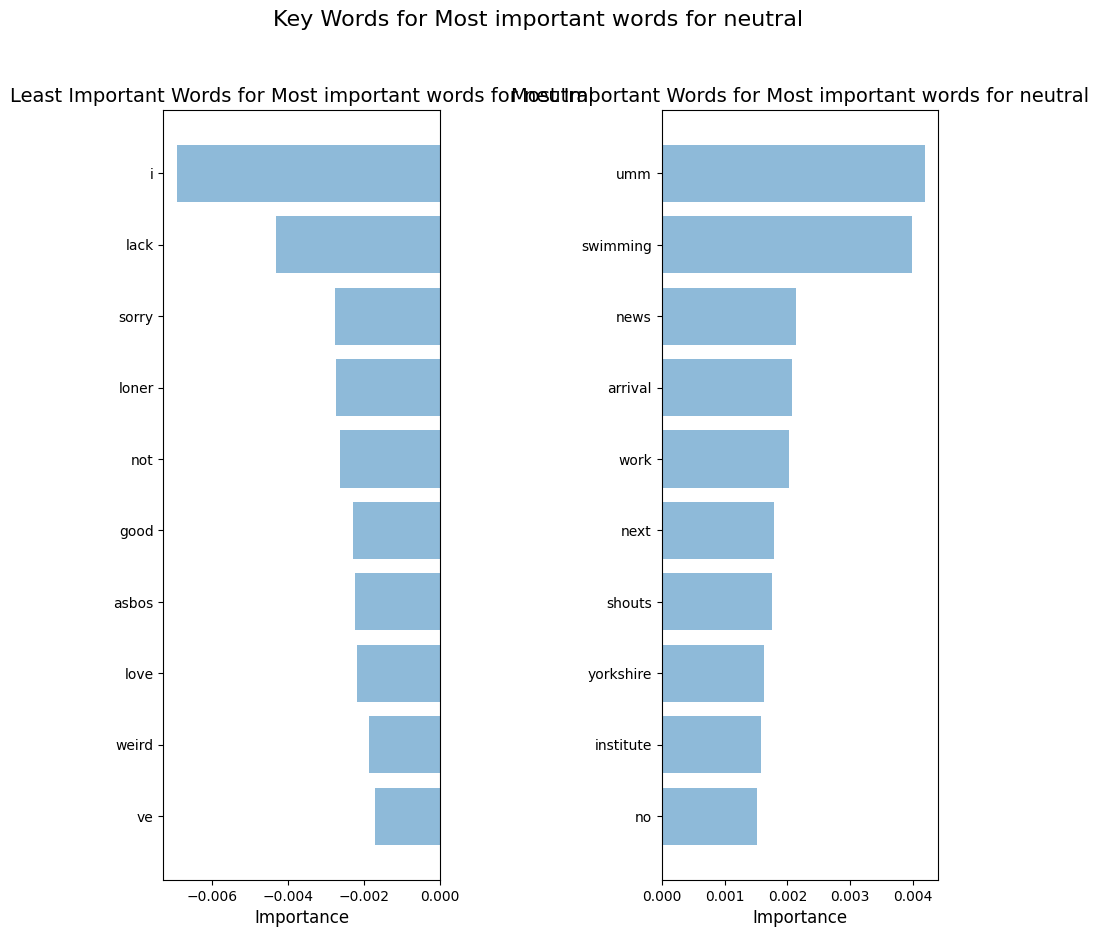

In [ ]:
import random
from collections import defaultdict
import pandas as pd
import numpy as np
from lime.lime_text import LimeTextExplainer
from nltk.tokenize import RegexpTokenizer
random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()
    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)

    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)

        for word, contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]

    average_contributions = {}
    sorted_contributions = {}
    for label, lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word, scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores)) / sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors': detractors,
            'supporters': supporters
        }
    return sorted_contributions


label_to_text = {
    0: 'negative',
    1: 'neutral',
    2: 'positive'
}

sorted_contributions = get_statistical_explanation(list(X_test_data), 100, word2vec_pipeline, label_to_text)

class_to_analyze = 'neutral'
top_words = sorted_contributions[class_to_analyze]['supporters'][:10].index.tolist()
top_scores = sorted_contributions[class_to_analyze]['supporters'][:10].tolist()
bottom_words = sorted_contributions[class_to_analyze]['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions[class_to_analyze]['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, f"Most important words for {class_to_analyze}")

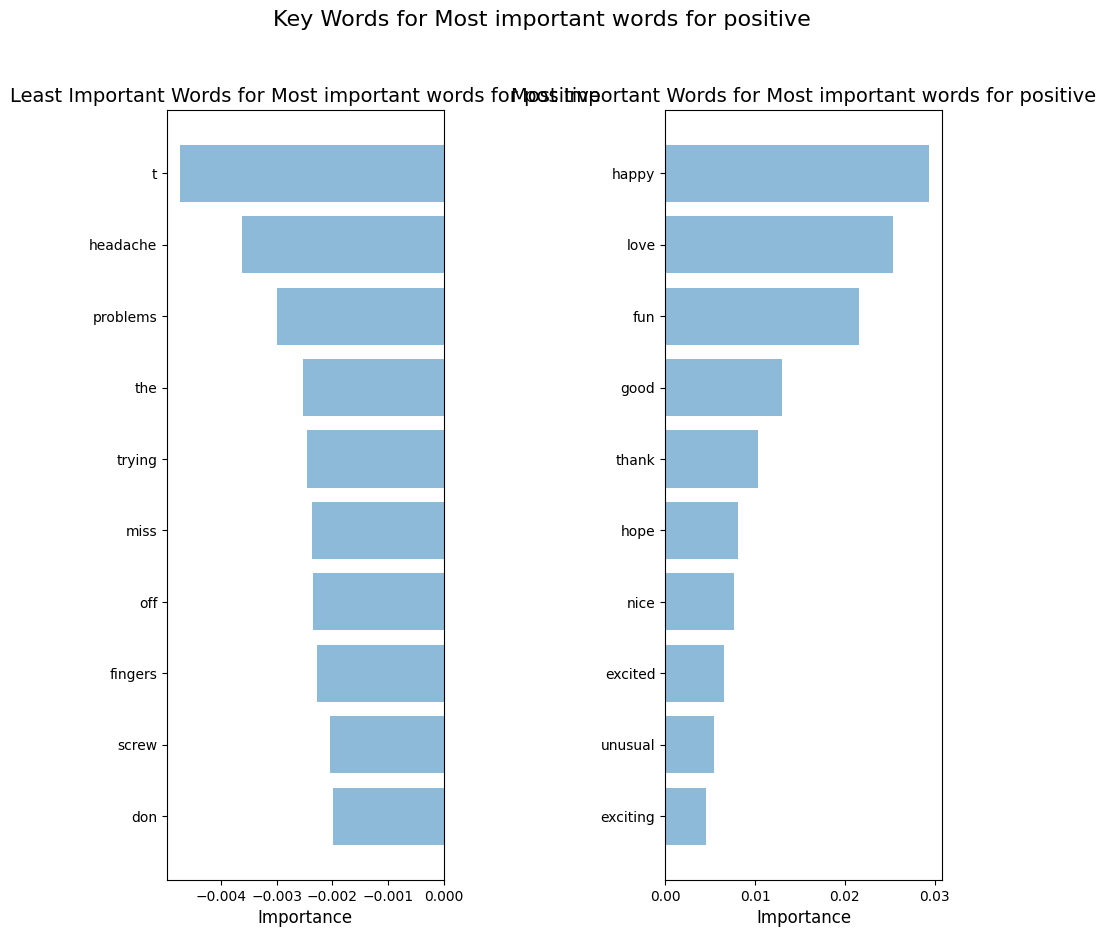

In [ ]:
class_to_analyze = 'positive'
top_words = sorted_contributions[class_to_analyze]['supporters'][:10].index.tolist()
top_scores = sorted_contributions[class_to_analyze]['supporters'][:10].tolist()
bottom_words = sorted_contributions[class_to_analyze]['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions[class_to_analyze]['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, f"Most important words for {class_to_analyze}")

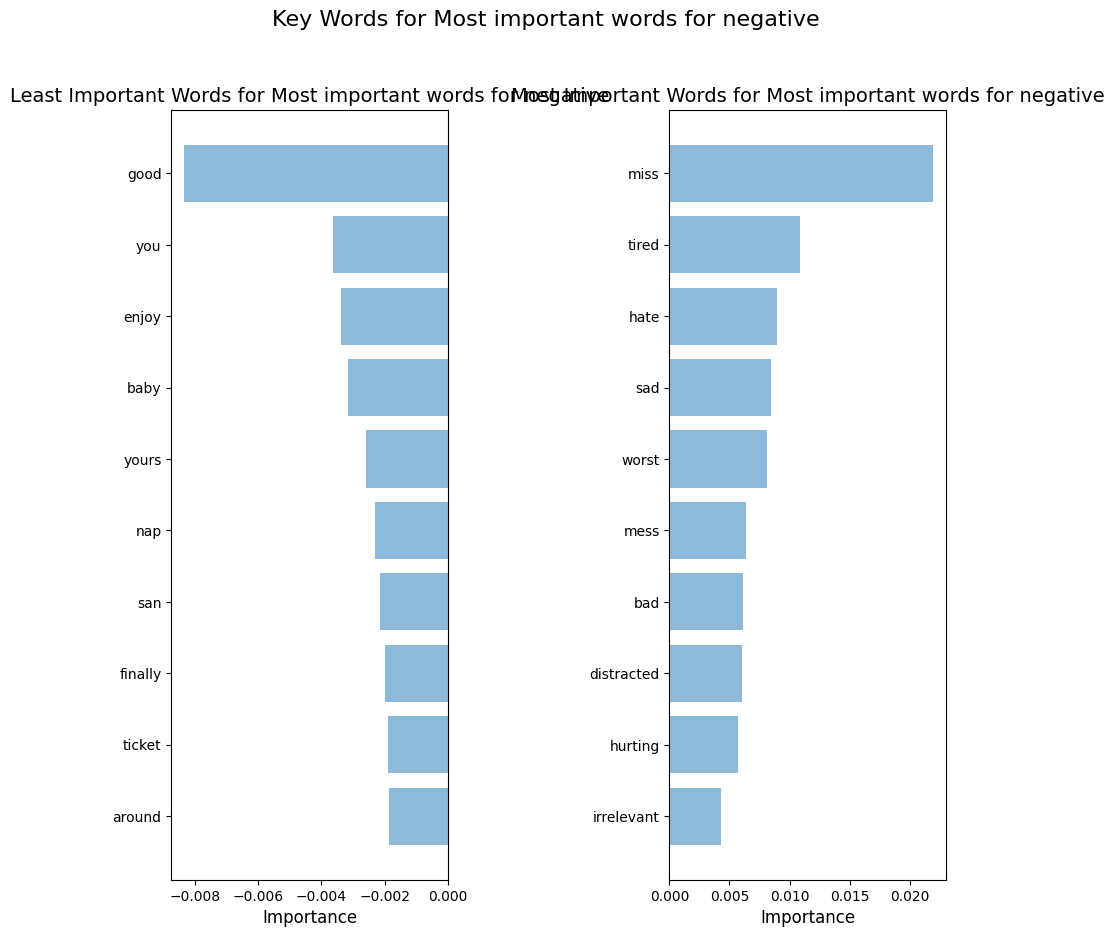

In [ ]:
class_to_analyze = 'negative'
top_words = sorted_contributions[class_to_analyze]['supporters'][:10].index.tolist()
top_scores = sorted_contributions[class_to_analyze]['supporters'][:10].tolist()
bottom_words = sorted_contributions[class_to_analyze]['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions[class_to_analyze]['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, f"Most important words for {class_to_analyze}")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 106


all_words = [word for tokens in balanced_df['tokens'] for word in tokens]
VOCAB = sorted(list(set(all_words)))
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT = .2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(balanced_df['tokens'].tolist())
sequences = tokenizer.texts_to_sequences(balanced_df['tokens'].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

le = LabelEncoder()
labels = to_categorical(le.fit_transform(balanced_df["sentiment"]))


indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, index in word_index.items():
    embedding_weights[index, :] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 25489 unique tokens.
(25490, 300)


In [ ]:
from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, num_classes, trainable=False, extra_conv=True):

    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)

    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)
    else:
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)

    preds = Dense(num_classes, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model


x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, len(le.classes_), False) # Изменение здесь

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

y_pred = model.predict(x_val)

y_pred_cnn = np.argmax(y_pred, axis=1)
y_val_cnn = np.argmax(y_val, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
146/146 ━━━━━━━━━━━━━━━━━━━━ 119s 805ms/step - acc: 0.3823 - loss: 1.1175 - val_acc: 0.5840 - val_loss: 0.8805
Epoch 2/3
146/146 ━━━━━━━━━━━━━━━━━━━━ 122s 836ms/step - acc: 0.6254 - loss: 0.8109 - val_acc: 0.6881 - val_loss: 0.7184
Epoch 3/3
146/146 ━━━━━━━━━━━━━━━━━━━━ 134s 781ms/step - acc: 0.7111 - loss: 0.6892 - val_acc: 0.7059 - val_loss: 0.6892
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step


In [ ]:
accuracy_cnn, precision_cnn, recall_cnn, f1_cnn = get_metrics(y_val_cnn, y_pred_cnn)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_cnn, precision_cnn, recall_cnn, f1_cnn))

accuracy = 0.711, precision = 0.723, recall = 0.711, f1 = 0.713


<Figure size 1000x1000 with 0 Axes>

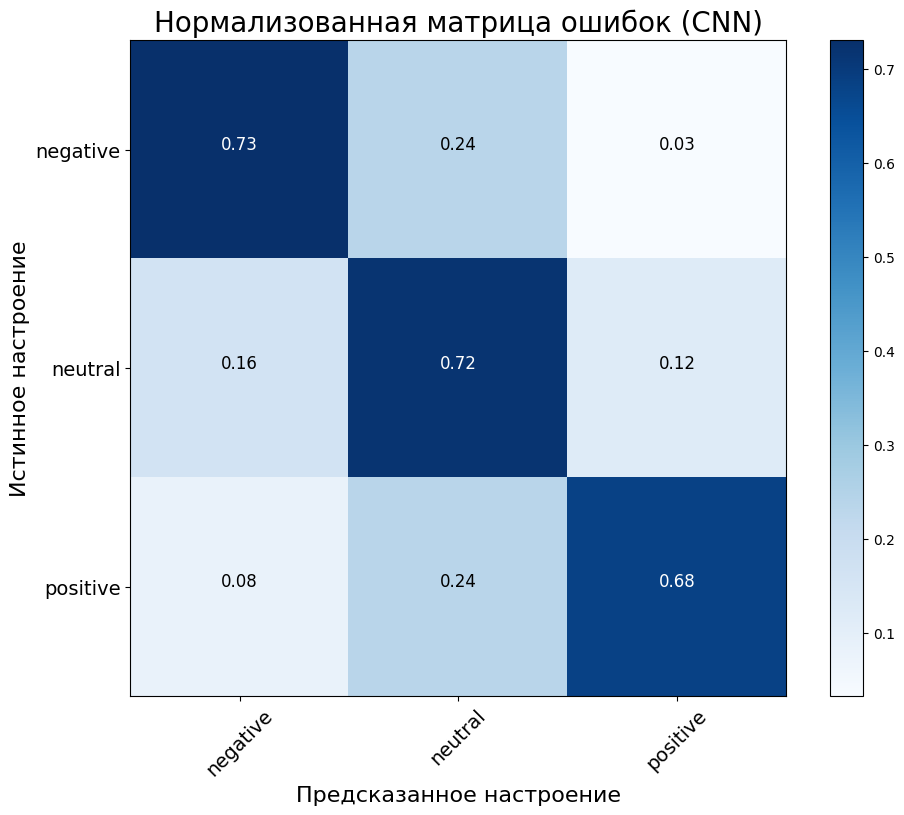


CNN confusion matrix:
[[1121  362   51]
 [ 260 1148  188]
 [ 126  362 1050]]

Word2Vec confusion matrix:
[[1083  357  105]
 [ 335  950  268]
 [ 112  339 1120]]

TF-IDF confusion matrix:
[[1043  394  108]
 [ 373  882  298]
 [ 115  312 1144]]

BoW confusion matrix:
[[1014  408  123]
 [ 354  900  299]
 [ 123  327 1121]]


In [ ]:
cm_cnn = confusion_matrix(y_val_cnn, y_pred_cnn)
classes = le.classes_ # Используем лейблы из LabelEncoder
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm_cnn, classes=classes, normalize=True, title='Нормализованная матрица ошибок (CNN)') # Изменение здесь
plt.show()

print("\nCNN confusion matrix:")
print(cm_cnn)
print("\nWord2Vec confusion matrix:")
print(cm_w2v)
print("\nTF-IDF confusion matrix:")
print(cm2)
print("\nBoW confusion matrix:")
print(cm)